# Sentimental analysis witch TextBlob

**Data - Twitter**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from textblob import TextBlob

In [2]:
df = pd.read_csv("Twitter_Data.csv")
df.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [12]:
sd = pd.read_csv("Reddit_Data.csv")
sd

clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37249 rows x 2 columns]

In [3]:
df.tail()

clean_text  category
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

In [4]:
df.shape

(162980, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [7]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [8]:
min = df.category.min()
min

-1.0

In [9]:
max = df.category.max()
max

1.0

In [10]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

df.head()

clean_text  category
0  when modi promised “minimum government maximum...  Negative
1  talk all the nonsense and continue all the dra...   Neutral
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Positive
4  answer who among these the most powerful world...  Positive

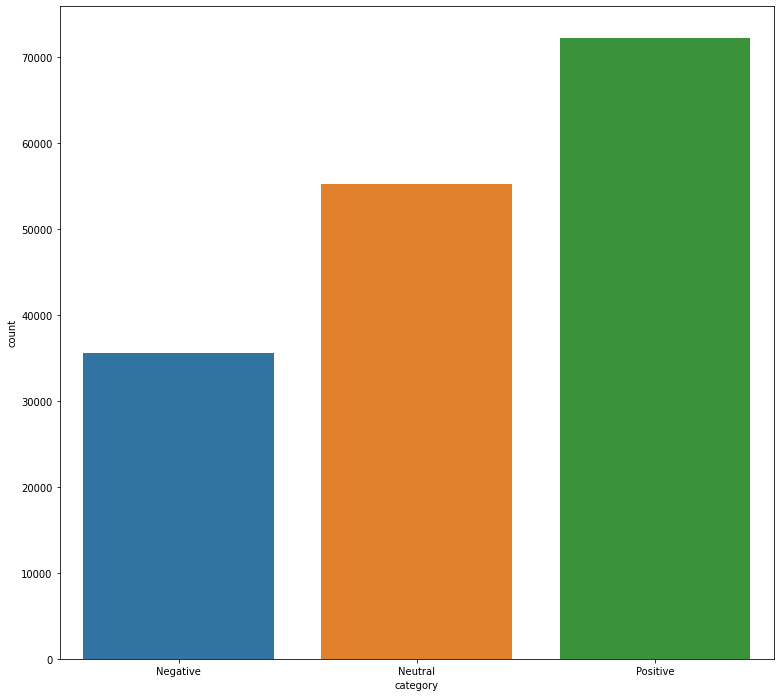

In [20]:
plt.figure(figsize=(12.8, 12))

ax = sns.countplot(df["category"])

In [18]:
import plotly.express as px

fig = px.pie(df, names='category', title ='Sentimental analysis tweets')
fig.show()

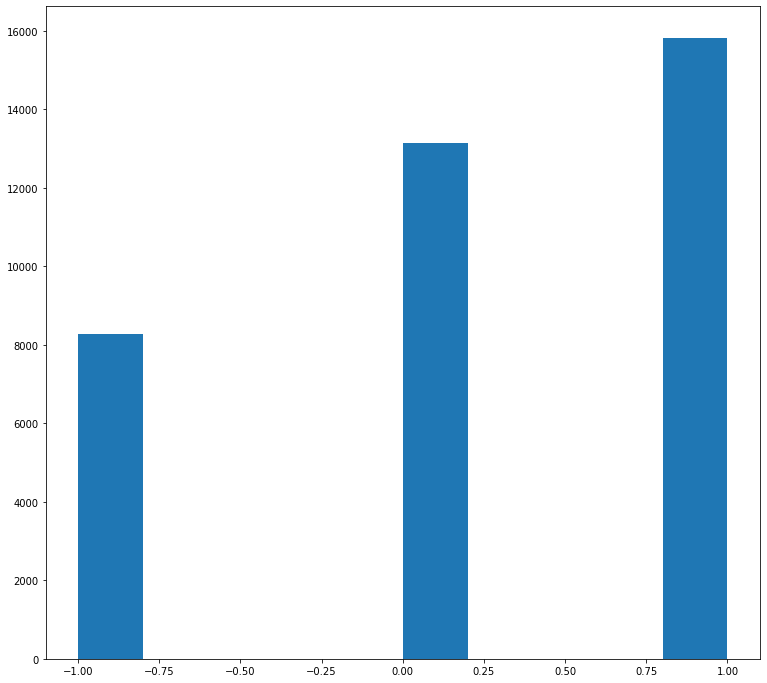

In [21]:
plt.figure(figsize=(12.8, 12))

plt.hist(sd["category"]);

In [79]:
text = list(df["clean_text"])
text

['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'talk all the nonsense and continue all the drama will vote for modi ',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'kiya tho refresh maarkefir comment karo ',
 'surat women perform yagna seeks divine grace for narendra modi become again\n',
 'this comes from cabinet which has scholars like modi smriti and hema time introspect',
 'with upcoming election india saga going important pair look current m

In [78]:
tweets = df.iloc[1750:]
tweets

clean_text  category
1750    narendra modi should not mangle dignity chair ...      -1.0
1751    government which has done nothing for years cr...      -1.0
1752    bedi its fine disagreeing with modi but make s...       1.0
1753    “ important but equally important don’ ignore ...       1.0
1754    next narendra modi the biggest loser the lok s...       0.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[161230 rows x 2 columns]

In [84]:
def list_text(list):
    result = " "
    for x in list:
        result += str(x)
    return result

text_twitter = list_text(text)
text_twitter[:10000]

' when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and templestalk all the nonsense and continue all the drama will vote for modi what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relaxasking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidarsanswer who among these the most powerful world leader today trump putin modi may kiya tho refresh maarkefir comment karo surat women perform yagna seeks divine grace for narendra modi become again\nthis comes from cabinet which has scholars like modi smriti and hema time introspectwith upcoming election india saga going important pair look current modi leads govt elected with deal brexit 

In [55]:
df_cole = list(df["clean_text"])

for analysis_text in df_cole:
    print(analysis_text)
    analysis = TextBlob(analysis_text)
    
    print(analysis.sentiment)
    print("-"*100)

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
Sentiment(polarity=-0.3, subjectivity=0.7)
----------------------------------------------------------------------------------------------------
talk all the nonsense and continue all the drama will vote for modi 
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------------------------------------
what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
Sentiment(polarity=0.48333333333333334, subjectivity=0.6166666666666667)
----------------------------------------------------------------------------------------------------
asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will 

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

**Data - Reddit**

In [76]:
sd = pd.read_csv("Reddit_Data.csv")
sd

clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37249 rows x 2 columns]

In [65]:
sd.tail()

clean_comment  category
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

In [64]:
sd.shape

(37249, 2)

In [66]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [67]:
sd.dtypes

clean_comment    object
category          int64
dtype: object

In [72]:
min = sd.category.min()
min

-1

In [73]:
max = sd.category.max()
max

1

In [63]:
df_cole_1 = list(sd["clean_comment"])

for analysis_text in df_cole_1:
    print(analysis_text)
    analysis = TextBlob(analysis_text)
    
    print(analysis.sentiment)
    print("-"*100)

 family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 
Sentiment(polarity=0.21666666666666665, subjectivity=0.45)
----------------------------------------------------------------------------------------------------
buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way sho

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>